# Exploratory Data Analysis

## Recommendation System Dataset


**Features:** App ID, Title, Prices (Original, Discounted), Release Date (YYYY-MM-DD), Operating System Availability (Windows, Mac, Linux), Rating (Positive, Very Positive, etc.), Ratio of Positive Reviews, Reviews Count

**Features (Headers):** app_id, title, date_release, win, mac, linux, rating, positive_ratio, user_reviews, price_final, price_original, discount, steam_deck

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Open CSV Dataset
path = r'RecommendationSystem\games.csv'
df = pd.read_csv(path)

In [3]:
#Print Feature Names
print(df.head(0))

Empty DataFrame
Columns: [app_id, title, date_release, win, mac, linux, rating, positive_ratio, user_reviews, price_final, price_original, discount, steam_deck]
Index: []


In [4]:
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


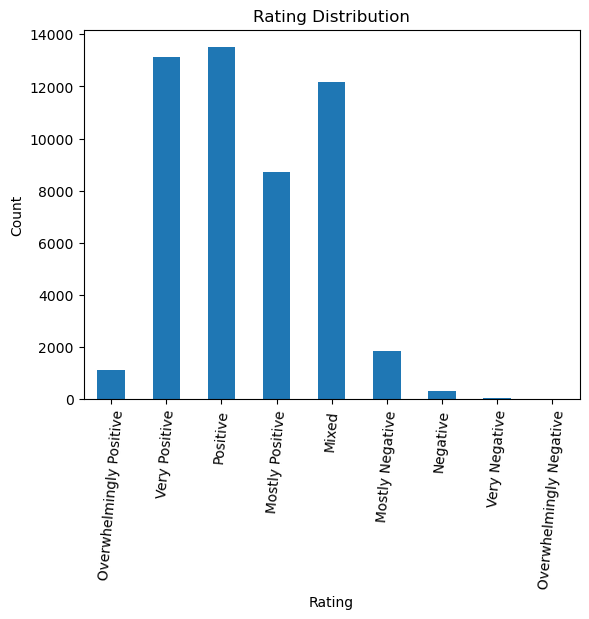

In [5]:
# Plotting the distribution of the 'rating' feature 
rating_order = ['Overwhelmingly Positive', 'Very Positive', 'Positive',
                'Mostly Positive', 'Mixed', 'Mostly Negative',
                'Negative', 'Very Negative', 'Overwhelmingly Negative']
df['rating'].value_counts().loc[rating_order].plot.bar()
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

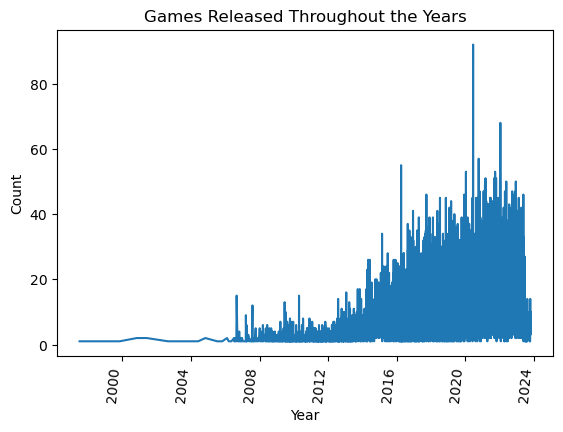

In [6]:
# Plotting the games released throughout the years
df['date_release'] = pd.to_datetime(df['date_release'], format='%Y-%m-%d')
df['date_release'].value_counts().sort_index().plot.line()
plt.title('Games Released Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

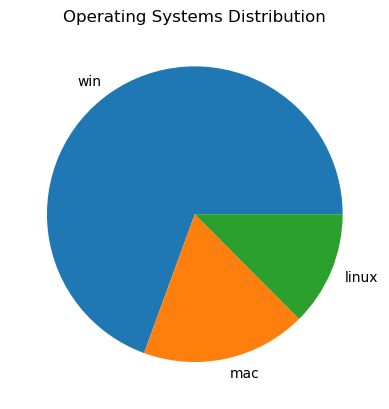

In [7]:
# Pie Chart of the 'win', 'mac', 'linux' feature
df[['win', 'mac', 'linux']].sum().plot.pie()
plt.title('Operating Systems Distribution')
plt.show()

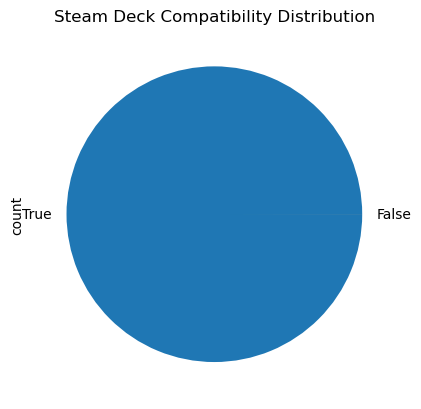

steam_deck
True     50870
False        2
Name: count, dtype: int64

In [8]:
# Pie Chart of 'steam_deck' feature
df['steam_deck'].value_counts().plot.pie()
plt.title('Steam Deck Compatibility Distribution')
plt.show()
df['steam_deck'].value_counts()

Text(0.5, 1.0, 'Average Price Over the Years')

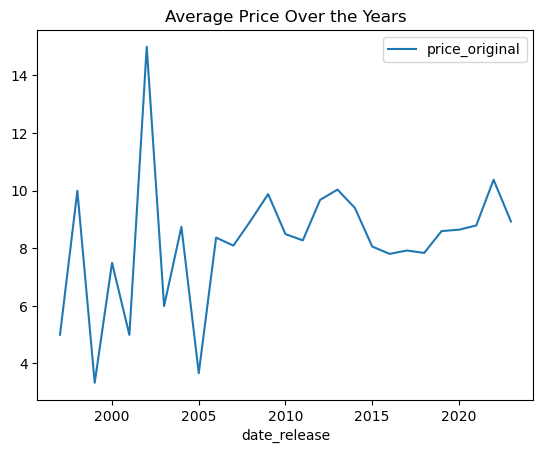

In [9]:
df_grouped = df.copy()
# Keep only 'release date' and 'price_original' columns
df_grouped = df_grouped[['date_release', 'price_original']]
df_grouped['date_release'] = pd.to_datetime(df_grouped['date_release'], format='%Y-%m-%d')
df_grouped['date_release'] = df_grouped['date_release'].dt.year
# Group by 'date_release' and avg 'price_original'
df_grouped = df_grouped.groupby('date_release').mean().reset_index()
# Graph df_grouped
df_grouped.plot(x='date_release', y='price_original', kind='line')
plt.title('Average Price Over the Years')

Text(0.5, 1.0, 'Average Price of Games over 90% Positive Ratio Over the Years')

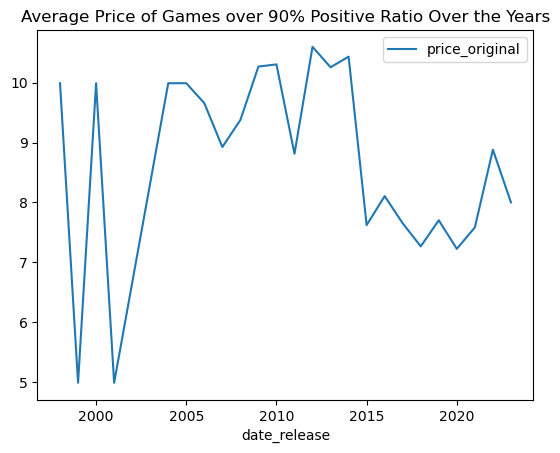

In [10]:
df_positive = df.copy()
# Keep only 'release date' 'positive_ratio' and 'price_original' columns
df_positive = df_positive[['date_release', 'price_original', 'positive_ratio']]
# Filter out rows with positive_ratio > 50%
df_positive = df_positive[df_positive['positive_ratio'] > 90]
df_positive['date_release'] = pd.to_datetime(df_positive['date_release'], format='%Y-%m-%d')
df_positive['date_release'] = df_positive['date_release'].dt.year
# Group by 'date_release' and avg 'price_original'
df_positive = df_positive.groupby('date_release').mean().reset_index()
# Graph df_positive
df_positive.plot(x='date_release', y='price_original', kind='line')
plt.title('Average Price of Games over 90% Positive Ratio Over the Years')


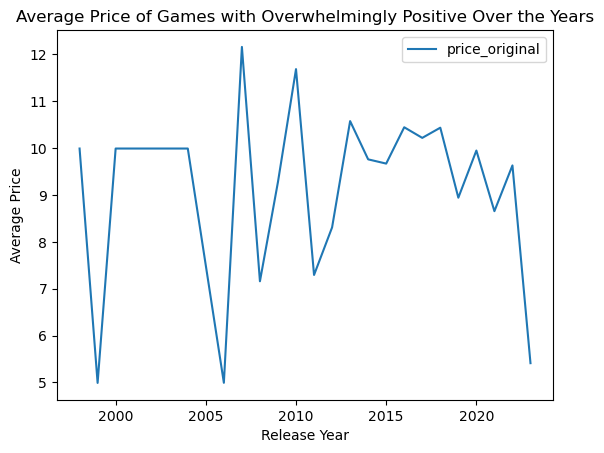

In [17]:
df_positive = df.copy()
# Keep only 'release date' 'rating' and 'price_original' columns
df_positive = df_positive[['date_release', 'price_original', 'rating']]
# Filter out rows that are not Overwhelmingly Positive
df_positive = df_positive[df_positive['rating'] == 'Overwhelmingly Positive']
# After removing the entires that weren't Overwhelmingly Positive, drop the 'rating' column
df_positive = df_positive.drop(columns=['rating'])
df_positive['date_release'] = pd.to_datetime(df_positive['date_release'], format='%Y-%m-%d')
df_positive['date_release'] = df_positive['date_release'].dt.year
# Group by 'date_release' and avg 'price_original'
df_positive = df_positive.groupby('date_release').mean().reset_index()
# Graph df_positive
df_positive.plot(x='date_release', y='price_original', kind='line')
plt.title('Average Price of Games with Overwhelmingly Positive Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Price')
plt.show()

Text(0.5, 1.0, 'Average Price of Games with Overwhelmingly Positive, Positive, and Mostly Positive Over the Years')

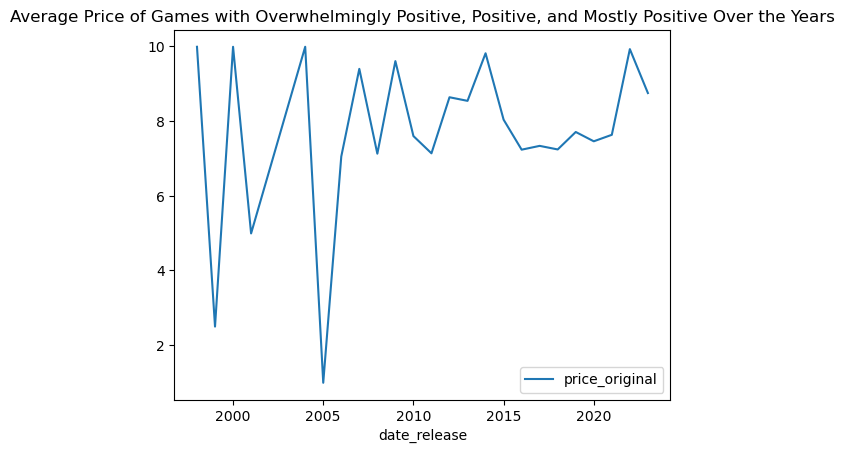

In [23]:
df_positive = df.copy()
# Keep only 'release date' 'rating' and 'price_original' columns
df_positive = df_positive[['date_release', 'price_original', 'rating']]
# Filter out rows that are not Overwhelmingly Positive
df_positive = df_positive[(df_positive['rating'] == 'Overwhelmingly Positive') | 
                          (df_positive['rating'] == 'Positive') | 
                          (df_positive['rating'] == 'Mostly Positive')]
# After removing the entires that weren't Overwhelmingly Positive, drop the 'rating' column
df_positive = df_positive.drop(columns=['rating'])
df_positive['date_release'] = pd.to_datetime(df_positive['date_release'], format='%Y-%m-%d')
df_positive['date_release'] = df_positive['date_release'].dt.year
# Group by 'date_release' and avg 'price_original'
df_positive = df_positive.groupby('date_release').mean().reset_index()
# Graph df_positive
df_positive.plot(x='date_release', y='price_original', kind='line')
plt.title('Average Price of Games with Overwhelmingly Positive, Positive, and Mostly Positive Over the Years')

Text(0.5, 1.0, 'Price Distribution')

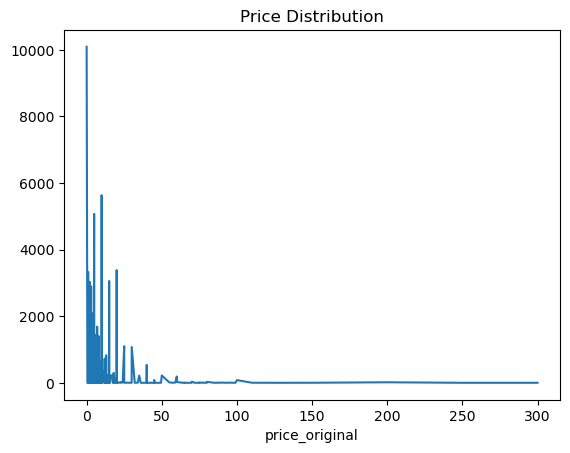

In [22]:
# Prices value count
df['price_original'].value_counts().sort_index().plot.line()
plt.title('Price Distribution')